In [43]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [44]:
#img1 = cv2.imread('images/img_sample1.png' ,0) # queryImage
#img2 = cv2.imread('images/img_sample2.png' ,0) # trainImage

img1 = cv2.imread('images/table1.png' ,0) # queryImage
img2 = cv2.imread('images/table2.png' ,0) # trainImage

In [45]:
sift = cv2.SIFT_create()

In [46]:
kp1 = sift.detect(img1,None)
kp2 = sift.detect(img2,None)

In [47]:
new_img1 = cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
new_img2 = cv2.drawKeypoints(img2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

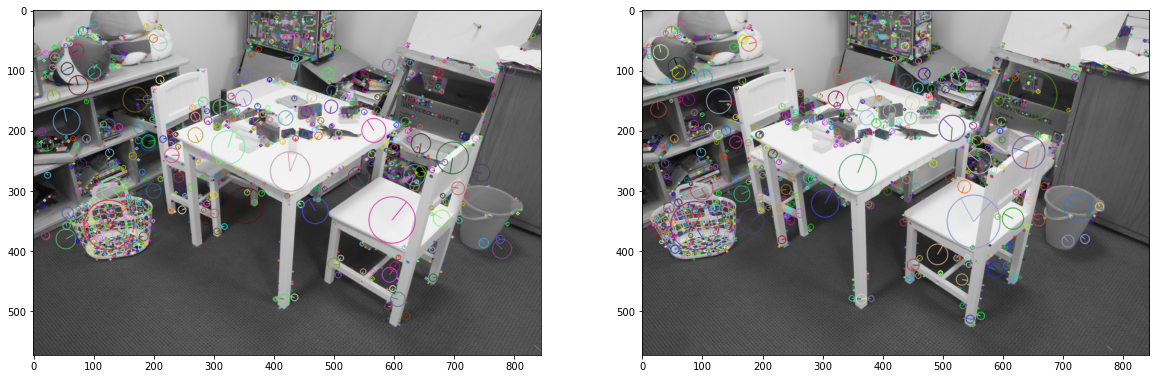

In [48]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1), plt.imshow(new_img1)
plt.subplot(1,2,2), plt.imshow(new_img2)
plt.show()

## Feature Matching

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [17]:
#img1 = cv2.imread('images/table1.png' ,0) # queryImage
#img2 = cv2.imread('images/table2.png' ,0) # trainImage
img1 = cv2.imread('images/img_sample1.png' ,0) # queryImage
img2 = cv2.imread('images/img_sample2.png' ,0) # trainImage

In [18]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

In [19]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [20]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [25]:
# Apply ratio test
good = []

for m,n in matches:
    if m.distance < 0.15*n.distance:
        good.append([m])
        
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None, flags=2)

In [26]:
print(len(good))

75


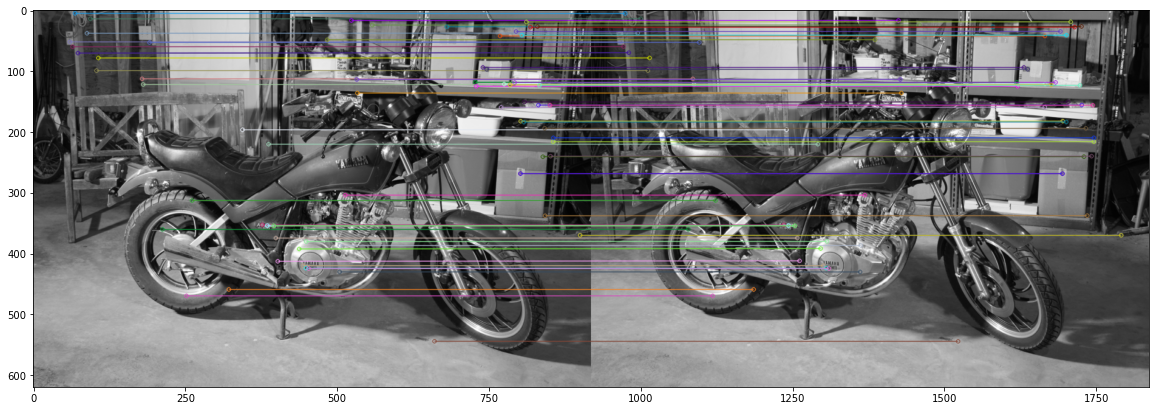

(<matplotlib.image.AxesImage at 0x21b20641730>, None)

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(img3), plt.show()